# SNPs + vertical transmission: Efast sensitivity analysis

In [1]:
from SALib.sample import saltelli, fast_sampler
import pandas as pd
from Sensitivity import Sensitivity
import joblib
model_path = "../models/BMI-SNP/"
output_path = "../output/data/"
plots_path = "../output/plots/"

In [2]:
# parameter dictionary
problem = {
    'num_vars': 4,
    'names': ['random-mating', 'genetic-variance', 'vertical-trans-variance', 'fertility-differential'],
    'bounds': [[0, 1.0],
               [0, 0.50],
               [0, 0.50],
               [0, 0.30]]
}

In [3]:
sample_parameters = False
if (sample_parameters):
    param_values = fast_sampler.sample(problem, 2000)
    t = pd.DataFrame(param_values)
    t.columns = ['random-mating', 'genetic-variance', 'vertical-trans-variance', 'fertility-differential']
    t.to_csv(model_path + "data/param-snp-vt-efast.csv", index=False)
else:
    t = pd.read_csv(model_path + "data/param-snp-vt-efast.csv")
t.shape

(8000, 4)

In [4]:
t.head()

,random-mating,genetic-variance,vertical-trans-variance,fertility-differential
0,0.932479,0.466239,0.466239,0.279744
1,0.683479,0.465739,0.458239,0.270444
2,0.434479,0.465239,0.450239,0.261144
3,0.185479,0.464739,0.442239,0.251844
4,0.063521,0.464239,0.434239,0.242544


In [5]:
# read data
df = pd.read_csv(output_path + "results-snp-vt-efast.csv", sep = ";")
cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)
colnames = ['g'+str(i+1) for i in range(4)]
cols.columns = colnames
cols = cols[colnames].apply(pd.to_numeric)
df = pd.concat([df, cols], axis=1, ignore_index=False)
params = pd.read_csv(output_path + "param-snp-vt-efast.csv", sep = ";")
df = df.merge(params, on = ["iteration", "replicate"])
df = df.sort_values(by=['iteration'])
df = df.loc[df["iteration"] <= len(t),:]

# select parameters
vars = ['p_vertical_trans_variance', 'p_random_mating', 'p_genetic_variance']
X = df.loc[:,vars]

/var/folders/36/wsfqn0_j2ng6r0b58wc559fc0000gn/T/ipykernel_7873/1951975228.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)


## Proportion obese

                               S1        ST   S1_conf   ST_conf
random-mating            0.157906  0.221462  0.004070  0.021711
genetic-variance         0.450918  0.548696  0.004295  0.017638
vertical-trans-variance  0.095304  0.135390  0.003852  0.019259
fertility-differential   0.153544  0.212431  0.003601  0.018172


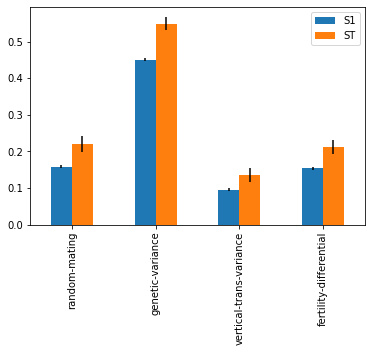

In [6]:
ef = Sensitivity(problem, df['g4'], X)
ef.score('efast')
ef.plot(save=True, filepath= plots_path + 'snp-vt-efast-prop-obese.pdf',
    move=True, moving_path= '../manuscript/plots/')
ef.plot3D(labels={'outcome':'obese', 'y':'random mating', 'x':'vertical transmission', 'z':'genes'})

sav = {
    'ef_obese_s1': ef.tabval('S1'),
    'ef_obese_st': ef.tabval('ST')
}

## Average BMI

                               S1        ST   S1_conf   ST_conf
random-mating            0.150315  0.209234  0.003250  0.019684
genetic-variance         0.446872  0.534047  0.003571  0.019063
vertical-trans-variance  0.085034  0.121277  0.004278  0.019054
fertility-differential   0.190854  0.250844  0.003371  0.019859


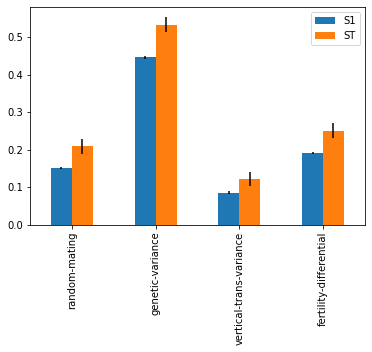

In [7]:
ef = Sensitivity(problem, df['average_bmi'], X)
ef.score('efast')
ef.plot(save=True, filepath= plots_path + 'snp-vt-efast-average-bmi.pdf',
    move=True, moving_path= '../manuscript/plots/')
ef.plot3D(labels={'outcome':'average bmi', 'y':'random mating', 'x':'vertical transmission', 'z':'genes'})

sav['ef_average_s1'] = ef.tabval('S1')
sav['ef_average_st'] = ef.tabval('ST')

## SD BMI

                               S1        ST   S1_conf   ST_conf
random-mating            0.013005  0.289920  0.003521  0.016968
genetic-variance         0.060067  0.365023  0.003485  0.019238
vertical-trans-variance  0.009343  0.179565  0.004223  0.018682
fertility-differential   0.378860  0.886203  0.003650  0.019422


['efast-snp-vt.pkl']

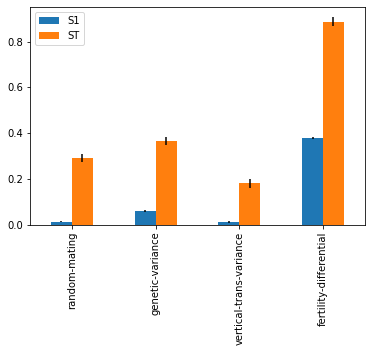

In [8]:
ef = Sensitivity(problem, df['sd_bmi'], X)
ef.score('efast')
ef.plot(save=True, filepath= plots_path + 'snp-vt-efast-sd-bmi.pdf',
    move=True, moving_path= '../manuscript/plots/')
ef.plot3D(labels={'outcome':'sd bmi', 'y':'random mating', 'x':'vertical transmission', 'z':'genes'})

sav['ef_sd_s1'] = ef.tabval('S1')
sav['ef_sd_st'] = ef.tabval('ST')

# save output
v = ef.createRows(sav)
joblib.dump(v, 'efast-snp-vt.pkl')